# <b>Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα</b>

1η Εργαστηριακή Άσκηση

**Α) ΣΤΟΙΧΕΙΑ ΟΜΑΔΑΣ**

Αριθμός Ομάδας: M.B.9

Βλάχος Ιωάννης Α.Μ. 03115013<br>
Κασουρίδης Στυλιανός Α.Μ. 03115172<br>
Χαρδούβελης Γεώργιος-Ορέστης Α.Μ. 03115100<br>



In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data


--2019-12-20 10:50:03--  http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76467 (75K) [application/x-httpd-php]
Saving to: ‘ionosphere.data’

ionosphere.data     100%[===================>]  74.67K   271KB/s    in 0.3s    

2019-12-20 10:50:04 (271 KB/s) - ‘ionosphere.data’ saved [76467/76467]



**Β) ΕΙΣΑΓΩΓΗ ΤΟΥ DATASET**

1. Το dataset αναφέρεται σε radar data που αφορούν την ιονόσφαιρα.

2. Συγκεκριμένα, είναι radar data που περιέχει έναν phased array από 16 κεραίες υψηλής συχνότητας. Τα σήματα που παίρνουμε είναι processed από μία autocorrelation function που παίρνει ως arguments το χρόνο και τον αριθμό παλμών. Τα "καλά" (good) radar μας δίνουν πληροφορίες για κάποια δομή για την ιονόσφαιρα, ενώ τα "κακά" (bad) όχι. Κάθε sample έχει 34 attributes, τα οποία περιέχουν τα 17 δεδομένα (complex numbers) και 1 flag που δείχνει αν το radar είναι good ή bad. \\
Τα χαρακτηριστικά μας είναι διατεταγμένα -ανα δύο- εφόσον κάθε δυάδα ορίζει έναν μιγαδικό αριθμό.

3. Δεν υπάρχουν επικεφαλίδες ούτε αφαίρεση γραμμών.

4. Οι ετικέτες των κλάσεων ορίζονται ως το "35ο χαρακτηριστικό" στην ανάλυση του dataset. Συνεπώς βρίσκονται στην 35η στήλη και παίρνουν τιμές από το σύνολο {'g', 'b'}, που αντιστοιχούν στον χαρακτηρισμό του κάθε radar ως good ή bad. 

5. Όπως φαίνεται παρακάτω, δεν χρειάστηκε κάποια επεξεργασία στα αρχεία, απλως διαβάστηκαν χρησιμοποιώντας την βιβλιοθήκη panda.

6. Δεν υπάρχουν απουσιάζουσες τιμές.

In [ ]:
import numpy as np
import pandas
df = pandas.read_csv('ionosphere.data',header=None)
small = df.to_numpy()
countg = 0
for i in small:
  if (i[-1] == 'g'):
    countg+=1
countb = 351-countg

print('7.','Good radars are', countg, 'and their percentage is', countg/351)
print('Bad radars are', countb, 'and their percentage is', countb/351)
print()

#proof that small dataset is unbalanced
if (max(countg,countb)/min(countg,countb) > 1.5):
  print('Unbalanced')

7. Good radars are 225 and their percentage is 0.6410256410256411
Bad radars are 126 and their percentage is 0.358974358974359

Unbalanced


7. Όπως είδαμε και παραπάνω, έχουμε μόλις δύο κλάσεις, g και b. Έχουμε περίπου 64% good δείγματα και 36% bad. Συνεπώς, επειδή η κλάση 'good' είναι μεγαλύτερη από 1,5 φορές η bad, έχουμε μη ισορροπημένο dataset

8. Διαχωρισμός σε train και test sets.
Στο small θα διαχωριστούν σε ποσοστό 80% - 20% (θεωρείται καλό ποσοστό).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(small[:,:-1], small[:,-1], test_size = 0.2,\
                                                        random_state = 67)

**Γ. BASELINE CLASSIFICATION**

In [ ]:
f1micros = []
f1macros = []
cm = []
acc_c=[]

1. Παρακάτω εκπαιδεύσαμε τα train δεδομένα μας με απλή αρχικοποήση των παραμέτρων. Φαίνονται τόσο οι confusion matrixes καθώς και οι μετρικές f1-micro και f1-macro, αλλά και άλλες μετρικές που θα χρειαστούν παρκάτω. 

In [ ]:
import time
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score


times_fit=[0,0,0,0]
times_pred=[0,0,0,0]
dummy_clf = DummyClassifier(strategy="most_frequent")
times_fit[0] = -time.time()
dummy_clf.fit(X_train, y_train)
times_fit[0] += time.time()
print('The confusion matrix of the test set is:')
times_pred[0]=-time.time()
predvec = dummy_clf.predict(X_test)
times_pred[0] += time.time()
cm.append(confusion_matrix(y_test,predvec))
print(cm[0])
print("Fit time is ", times_fit[0])
print("Predict time is ", times_pred[0])
f1micros.append(f1_score(y_test,predvec,average='micro'))
f1macros.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1micros[0])
print("F1 macro", f1macros[0])
'''
print("Precision score is ", precision_score(y_test, predvec, average='micro'))
print("Recall  score is ", recall_score(y_test, predvec, average='micro'))
'''
d_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", d_acc)

The confusion matrix of the test set is:
[[ 0 20]
 [ 0 51]]
Fit time is  0.0025224685668945312
Predict time is  0.0002257823944091797
F1 micro is  0.7183098591549296
F1 macro 0.4180327868852459
Accuracy score is  0.7183098591549296


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_clf = KNN(n_neighbors=3)
time0 = -time.time()
knn_clf.fit(X_train, y_train)
time0 += time.time()
print('The confusion matrix of the test set is:')
time1 = -time.time()
predvec = knn_clf.predict(X_test)
time1 += time.time()
cm.append(confusion_matrix(y_test,predvec))
print(cm[1])
print("Fit time is ", time0)
print("Predict time is ", time1)
f1micros.append(f1_score(y_test,predvec,average='micro'))
f1macros.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1micros[1])
print("F1 macro", f1macros[1])
'''
print("Precision score is ", precision_score(y_test, predvec, average='micro'))
print("Recall  score is ", recall_score(y_test, predvec, average='micro'))
'''
knn_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", knn_acc)

The confusion matrix of the test set is:
[[12  8]
 [ 1 50]]
Fit time is  0.006478786468505859
Predict time is  0.005850076675415039
F1 micro is  0.8732394366197183
F1 macro 0.8223519599666389
Accuracy score is  0.8732394366197183


2. Τυπώνουμε τα ζητούμενα barplots με τις τιμές f1-micro και f1-macro των dummy και knn ταξινομητών, όπως υπολογίστηκαν παραπάνω. 

In [ ]:
l = ['dummy', 'knn']
for i, mat in enumerate(cm):
  print(l[i])
  print(mat)
  true_pos = mat[0][0]
  false_pos = mat[1][0]
  false_neg = mat[0][1]

  precision = true_pos / (true_pos + false_pos)
  recall = true_pos / (true_pos + false_neg)
  accuracy = np.sum(np.diag(mat) / np.sum(mat))
  print("Precision is ", precision, "Recall is ", recall, "Accuracy is", accuracy)
  print()
  

dummy
[[ 0 20]
 [ 0 51]]
Precision is  nan Recall is  0.0 Accuracy is 0.7183098591549296

knn
[[12  8]
 [ 1 50]]
Precision is  0.9230769230769231 Recall is  0.6 Accuracy is 0.8732394366197183



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


[Text(0, 0, 'Dummy'), Text(0, 0, '3NN')]

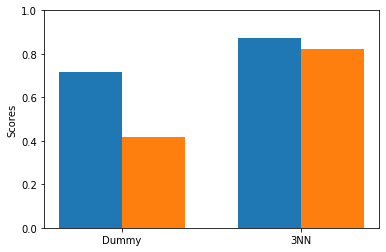

In [ ]:
import matplotlib.pyplot as plt
labels = ['Dummy','3NN']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1micros, width, label='Micro')
rects2 = ax.bar(x + width/2, f1macros, width, label='Macro')
ax.set_ylabel('Scores')
ax.set_ylim(top=1)
ax.set_xticks(x)
ax.set_xticklabels(labels)

3. Τα score του dummy ταξινομητή είναι σχετικά υψηλά δεδομένου ότι το dataset μας είναι unbalanced. Παρόλα αυτά, από το confusion matrix και το recall φαίνεται πως κάνει συνέχεια την ίδια πρόβλεψη και τελικώς δεν είναι αποδοτικός. Ακόμη το precision δεν ορίζεται μιας και, λόγω των μηδενικών στον confusion matrix, γίνεται διαίρεση με μηδέν. Τέλος, η τιμή f1-macro βγαίνει χαμηλή αφού υπολογίζεται η μετρική ξεχωριστά για κάθε κλάση και υπολογίζει τον μέσο όρο. Συνεπώς, εφόσον ο dummy μεγιστοποιεί την απόδοση της μίας τάξης, η άλλη βγάζει χαμηλά αποτελέσματα και προκύπτει λιγότερο υψηλή τιμή. \\
Αντίθετα, στον knn ταξινομητή έχουμε πολύ καλύτερα αποτελέσματα. Προφανώς δεν φτάνουμε σε πολύ υψηλές τιμές λόγω του μικρού μεγέθους του dataset μας. Συγκεκριμένα, το precision που δίνεται από το ποσοστό των σωστά ταξινομημένων good radar από τα συνολικά ταξινομημένα good radar, είχε υψηλή τιμή, ενώ το recall που δίνεται από το ποσοστό των σωστά ταξινομημένων good radar από τα συνολικά labeled good radar τιμή που πλησιάζει το ποσοστό δειγμάτων της κλάσης good.\\
Σε γενικές γραμμές, οι f1 τιμές που συνοψίζουν την απόδοση των ταξινομητών μας φαίνονται στο παραπάνω διάγραμμα, όπου στο knn έχουμε σαφώς καλύτερα αποτελέσματα. Παρατηρούμε ακόμη πως οι μετρικές f1-micro εμφανίζονται καλύτερες από τις f1-macro.

**Δ) ΒΕΛΤΙΣΤΟΠΟΙΗΣΗ ΤΑΞΙΝΟΜΗΤΩΝ**

1. 

Εδώ βελτιστοποιούμε την απόδοση των ταξινομητών, τόσο σε επίπεδο προεπεξεργασίας όσο και με την εύρεση βέλτιστων παραμέτρων. \\
Σε επίπεδο προεπεξεργασίας δεδομένων, εξετάστηκαν ορισμένες τροποποιήσεις και τεχνικές πάνω στο dataset πριν γίνει η εκπαίδευση που είναι γνωστές για την βελτίωση των αποτελεσμάτων. Συγκεκριμένα, εξετάστηκαν οι μέθοδοι scaling όπου κανονικοποιεί τις τιμές των χαρακτηριστικών, PCA για μείωση της διαστατικότητας και με κατώφλι διασποράς, απορρίπτωντας χαρακτηριστικά με χαμηλή διασπορά.

</br>

Αρχικά υπολογίζουμε την διασπορά του κάθε χαρακτηριστικού, και τις τυπώνουμε, ώστε να επιλέξουμε κατάλληλες τιμές threshold για την διασπορά. Επιλέχθηκαν οι τιμές 0.1, 0.2 και 0.25. 

In [ ]:
train_variance = X_train.var(axis=0)
print(train_variance)

[0.09566326530612278 0.0 0.26173599922042745 0.1997922956880091
 0.2882116499303968 0.21760313175795426 0.24785915554953966
 0.2809769874468559 0.27384636275993735 0.24428780856891683
 0.33538883370903594 0.24369880912141717 0.38878754704721247
 0.24128234774486593 0.4112847796355808 0.1992736299957535
 0.39586995731463115 0.24724864745655115 0.3981184712437744
 0.2770255457114681 0.37617816295474976 0.2679344721290703
 0.3764324020540615 0.273362419439852 0.34272620486214134
 0.25280844846311085 0.2779521512645397 0.30633480068071306
 0.34994227005749884 0.2476293274606827 0.3381742950498454
 0.26169819281232126 0.2860810359705091 0.21277278748112247]


Στην συνέχεια, ξεκινώντας από τον knn ταξινομητή, υλοποιήθηκε ένα gridsearch με σκοπό την εύρεση της βέλτιστης υπερπαραμέτρου k για κάθε συνδυασμό μεθόδων προεπεξεργασίας. Στο πρώτο από τα κελιά που ακολουθούν ενσωματώθηκε και η μέθοδος PCA ενώ στο δεύτερο χωρίς. Αυτό θα μπορούσε να γίνει και σε βήματα αλλά λόγω του μικρού μεγέθους του dataset έγινε exhaustive search. Επίσης τα παρακάτω κελιά υλοποιήθηκαν και με και χωρίς την χρήση scaler και επιλέχθηκε η μέθοδος που έβγαζε τα καλύτερα αποτελέσματα (με scaler).

Για τον αριθμό των γειτόνων k επιλέγουμε περιττές τιμές από 1 εώς 19 ώστε να αποφευχθούν περιπτώσεις ισοπαλίας, ενώ για τις διαστάστασεις του PCA τιμές μέχρι και 20 διαστάσεις. Οι τιμές επιλέχθηκαν έτσι ώστε μετά την αφαίρεση χαρακτηριστικών από την μέθοδο v_threshold να μένουν πάντα περισσότερα ή ίσα από την επιλογή διαστάσεων στο PCA.

Τέλος βρίσκουμε τα στοιχεία του πίνακα με την καλύτερη επίδοση και τους συνδυασμούς των παραμέτρουν που την επιφέρουν, τόσο σε σχέση με την μετρική f1-micro όσο και με την f1-macro.

Για να υπολογίσουμε την επίδοση του μοντέλου με τον κάθε συνδυασμό παραμέτρων υλοποιούμε μέθοδο cross validation. Συγκεκριμένα, χωρίσσαμε το train dataset σε 10 ίσα μέρη και σε κάθε επανάληψη χρησιμοποιήσαμε το ένα από αυτά σαν test set ενώ τα υπόλοιπα ως train. Οι τελικές μετρικές υπολογίστηκαν ως ο μέσος όρος των μετρικών για κάθε συνδυασμό. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

ks = range(1,20,2)
pcas = range(2,20,4)
vs = [0.0, 0.1, 0.2, 0.25]
f1mics = np.zeros((len(vs), len(pcas), len(ks)))
f1macs = np.zeros((len(vs), len(pcas), len(ks)))

for c1,v in enumerate(vs):
  indexes = []
  for i in range(len(train_variance)):
    if train_variance[i]<v:
      indexes.append(i)
  X_tr_new = X_train
  for i in indexes[::-1]:
    X_tr_new=np.delete(X_tr_new, i, 1)
  for c2, p in enumerate(pcas):
    #if(p<34-len(indexes)):
    pca = PCA(n_components=p)
    #else:
      #pca = PCA(n_components= (34-len(indexes)))
    X = scale(X_tr_new)
    X = pca.fit_transform(X)
    #X = scale(X)
    for c3, i in enumerate(ks):
      temp1=[]
      temp2=[]
      for cv in range(10):
        X_val = X[28*cv:28*(cv+1)]
        X_tr = np.concatenate((X[0:28*cv],X[28*(cv+1):]))
        y_val = y_train[28*cv:28*(cv+1)]
        y_tr = np.concatenate((y_train[0:28*cv],y_train[28*(cv+1):]))
        knn_clf = KNN(n_neighbors=i)
        knn_clf.fit(X_tr, y_tr)
        predvec = knn_clf.predict(X_val)
        temp1.append(f1_score(y_val,predvec,average='micro'))
        temp2.append(f1_score(y_val,predvec,average='macro'))
      f1mics[c1,c2,c3]=np.mean(np.array(temp1))
      f1macs[c1,c2,c3]=np.mean(np.array(temp2))
max_el = np.max(f1mics)
print("best parameters based on f1_micro are:")
for i in range(f1mics.shape[0]):
  for j in range(f1mics.shape[1]):
    for k in range(f1mics.shape[2]):
      if f1mics[i,j,k]==max_el:
        print("Variance threshold=",vs[i])
        print("Number of pca components=", pcas[j])
        print("K neighbors in KNN classifier=", ks[k])
        print()
max_el = np.max(f1macs)
print("best parameters based on f1_macro are:")
for i in range(f1macs.shape[0]):
  for j in range(f1macs.shape[1]):
    for k in range(f1macs.shape[2]):
      if f1macs[i,j,k]==max_el:
        print("Variance threshold=",vs[i])
        print("Number of pca components=", pcas[j])
        print("K neighbors in KNN classifier=", ks[k])
        print()

best parameters based on f1_micro are:
Variance threshold= 0.25
Number of pca components= 10
K neighbors in KNN classifier= 1

best parameters based on f1_macro are:
Variance threshold= 0.2
Number of pca components= 10
K neighbors in KNN classifier= 1



In [ ]:
#without PCA
ks = range(1,20,2)
vs = [0.0, 0.1, 0.2, 0.25]
f1mics = np.zeros((len(vs), len(ks)))
f1macs = np.zeros((len(vs), len(ks)))

for c1,v in enumerate(vs):
  indexes = []
  for i in range(len(train_variance)):
    if train_variance[i]<v:
      indexes.append(i)
  X = scale(X_train) #we checked and it's sooo much better
  for c3, i in enumerate(ks):
    temp1=[]
    temp2=[]
    for cv in range(10):
      X_val = X[28*cv:28*(cv+1)]
      X_tr = np.concatenate((X[0:28*cv],X[28*(cv+1):]))
      y_val = y_train[28*cv:28*(cv+1)]
      y_tr = np.concatenate((y_train[0:28*cv],y_train[28*(cv+1):]))
      knn_clf = KNN(n_neighbors=i)
      knn_clf.fit(X_tr, y_tr)
      predvec = knn_clf.predict(X_val)
      temp1.append(f1_score(y_val,predvec,average='micro'))
      temp2.append(f1_score(y_val,predvec,average='macro'))
    f1mics[c1,c3]=np.mean(np.array(temp1))
    f1macs[c1,c3]=np.mean(np.array(temp2))
max_el = np.max(f1mics)
print("best parameters based on f1_micro are:")
for i in range(f1mics.shape[0]):
  for k in range(f1mics.shape[1]):
    if f1mics[i,k]==max_el:
      print("Variance threshold=",vs[i])
      print("K neighbors in KNN classifier=", ks[k])
      print()
max_el = np.max(f1macs)
print("best parameters based on f1_macro are:")
for i in range(f1macs.shape[0]):
  for k in range(f1macs.shape[1]):
    if f1macs[i,k]==max_el:
      print("Variance threshold=",vs[i])
      print("K neighbors in KNN classifier=", ks[k])
      print()


best parameters based on f1_micro are:
Variance threshold= 0.0
K neighbors in KNN classifier= 1

Variance threshold= 0.0
K neighbors in KNN classifier= 3

Variance threshold= 0.1
K neighbors in KNN classifier= 1

Variance threshold= 0.1
K neighbors in KNN classifier= 3

Variance threshold= 0.2
K neighbors in KNN classifier= 1

Variance threshold= 0.2
K neighbors in KNN classifier= 3

Variance threshold= 0.25
K neighbors in KNN classifier= 1

Variance threshold= 0.25
K neighbors in KNN classifier= 3

best parameters based on f1_macro are:
Variance threshold= 0.0
K neighbors in KNN classifier= 1

Variance threshold= 0.1
K neighbors in KNN classifier= 1

Variance threshold= 0.2
K neighbors in KNN classifier= 1

Variance threshold= 0.25
K neighbors in KNN classifier= 1



Βλέπουμε πως έχουμε βέλτιστα αποτελέσματα για k=1.  Αυτό δεν μας κάνει τόση εντύπωση δεδομένου του dataset, καθώς πρόκειται για ένα 2-class problem στο οποίο οι 2 κλάσεις είναι καλά ομαδοποιημένες. Γενικά, με μεγαλύτερο αριθμό γειτόνων φτιάχνεται ταξινομητής με χαμηλότερη διακύμανση και υψηλότερη απόκλιση, ενώ με λίγότερους (όπως στην περίπτωση μας) έχουμε υψηλή διακύμανση και χαμηλότερη απόκλιση, και κατά συνέπεια ο ταξινομητής αγνοεί σε μεγάλο ποσοστό την συνολική κατανομή και δίνει βαρύτητα στην απόφαση με βάση μόνο το κοντινότερο βήμα (δηλαδή το decision boundary θα περνάει από τις μεσοκαθέτουςτων γειτονικών δειγμάτων διαφορετικής τάξης). 

Ακόμη, χωρίς το PCA, παρατηρούμε πως το variance threshold δεν είχε επιρροή στην επίδοση. 
</br>
</br>
</br>
Παρακάτω κάναμε παρόμοια διαδικασία για τον dummy classifier. Εφόσον επιλέγει αυθαίρετη ταξινόμηση για κάθε δείγμα, δεν υλοποιήθηκε κάποια προεπεξεργασία δεδομένων. Ελέγχθηκε απλώς η βέλτιστη στρατηγική του ταξινομητή για τις μετρικές f1-micro και f1-macro.

In [ ]:
f1 =[]
f2=[]

arr = ["most_frequent", "stratified", "prior", "uniform"]
for i in arr:
  temp1=[]
  temp2=[]
  for cv in range(10):
    X_val = X[28*cv:28*(cv+1)]
    X_tr = np.concatenate((X[0:28*cv],X[28*(cv+1):]))
    y_val = y_train[28*cv:28*(cv+1)]
    y_tr = np.concatenate((y_train[0:28*cv],y_train[28*(cv+1):]))
    dummy_clf = DummyClassifier(strategy=i)
    dummy_clf.fit(X_train, y_train)
    predvec = dummy_clf.predict(X_val)
    temp1.append(f1_score(y_val,predvec,average='micro'))
    temp2.append(f1_score(y_val,predvec,average='macro'))    
  f1.append(np.mean(np.array(temp1)))
  f2.append(np.mean(np.array(temp2)))
'''
print(f1)
print(f2)
'''
print("Considering f1 -> ", arr[np.argmax(f1)])
print("Considering f2 -> ", arr[np.argmax(f2)])

Considering f1 ->  most_frequent
Considering f2 ->  stratified


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Με βάση τα παραπάνω αποτελέσματα, υλοποιούμε πλέον τους ταξινομητές με τις βέλτιστες παραμέτρους. Για τον knn, κρατήσαμε τις υλοποιήσεις και με PCA και χωρίς. Όπως περιμέναμε, με PCA έχουμε μείωση της επίδοσης του ταξινομητή μιας και είχαμε λίγα χαρακτηριστικά αλλά και δείγματα, όμως για μεγαλύτερα μεγέθη ίσως θα ήταν αναγκαίος. Ταυτόχρονα τυπώνουμε τις μετρικές επίδοσης για κάθε ταξινομητή.

In [ ]:
knn_clf = KNN(n_neighbors=1)
f1m=[]
f1M=[]
train_variance = X_train.var(axis=0)
#train_variance = np.concatenate((X_train, X_test), axis=0).var(axis=0)

indexes = []
for i in range(len(train_variance)):
  if train_variance[i]<0.25:
    indexes.append(i)
X_tr_new = X_train
X_te_new = X_test

for i in indexes[::-1]:
  X_tr_new=np.delete(X_tr_new, i, 1)
  X_te_new=np.delete(X_te_new, i, 1)


pca = PCA(n_components=10)
#X = scale(X_tr_new)
X = pca.fit_transform(X_tr_new)


#X_te = scale(X_te_new)
X_te = pca.fit_transform(X_te_new)

times_fit[2] =-time.time()
knn_clf.fit(X, y_train)
times_fit[2] += time.time()
print('The confusion matrix of the test set is:')
times_pred[2] =-time.time()
predvec = knn_clf.predict(X_te)
times_pred[2] += time.time()
print(confusion_matrix(y_test, predvec))
cm_knn1 = confusion_matrix(y_test, predvec)
print("Fit time is", times_fit[2])
print("Predict time is", times_pred[2])

print("F1 micro score is", f1_score(y_test, predvec, average='micro'))
f1m.append(f1_score(y_test, predvec, average='micro'))
print("F1 macro score is", f1_score(y_test, predvec, average='macro'))
f1M.append(f1_score(y_test, predvec, average='macro'))
'''
print("Precision score is", precision_score(y_test, predvec, average='micro'))
print("Recall  score is", recall_score(y_test, predvec, average='micro'))
'''
knn2_acc = accuracy_score(y_test, predvec)
print("Accuracy score is", knn2_acc)

The confusion matrix of the test set is:
[[10 10]
 [ 8 43]]
Fit time is 0.0009701251983642578
Predict time is 0.004235982894897461
F1 micro score is 0.7464788732394367
F1 macro score is 0.6766194331983806
Accuracy score is 0.7464788732394366


In [ ]:
#without PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_clf = KNN(n_neighbors=1)
times_fit[3] = -time.time()
X = normalize(X_train)
X = scale(X_train)   
knn_clf.fit(X, y_train)
times_fit[3] += time.time()
print('The confusion matrix of the test set is:')
times_pred[3] = -time.time()
X2 = scale(X_test)
predvec = knn_clf.predict(X2)
times_pred[3] += time.time()

cm_knn2=confusion_matrix(y_test,predvec)
print(cm_knn2)
print("Fit time is ", time0)
print("Predict time is ", time1)
f1m.append(f1_score(y_test,predvec,average='micro'))
f1M.append(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1_score(y_test,predvec,average='micro'))
print("F1 macro", f1_score(y_test,predvec,average='macro'))
'''
print("Precision score is ", precision_score(y_test, predvec, average='micro'))
print("Recall  score is ", recall_score(y_test, predvec, average='micro'))
'''
knn3_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", knn3_acc)


The confusion matrix of the test set is:
[[16  4]
 [ 0 51]]
Fit time is  0.006478786468505859
Predict time is  0.005850076675415039
F1 micro is  0.9436619718309859
F1 macro 0.9255765199161425
Accuracy score is  0.9436619718309859


Αντίστοιχα για τον dummy classifier με μέθοδο πρόβλεψης stratified εκτυπώνουμε τον πίνακα σύγχυσης, τους χρόνους εκπαίδευσης και πρόβλεψης όπως επίσης και τις τιμές των μετρικών f1_micro και f1_macro.

In [ ]:
#dummy for stratified

dummy_clf = DummyClassifier(strategy="stratified")
times_fit[1] = -time.time()
dummy_clf.fit(X_train, y_train)
times_fit[1] += time.time()
print('The confusion matrix of the test set is:')
times_pred[1] =-time.time()
predvec = dummy_clf.predict(X_test)
times_pred[1] += time.time()
cm_ds=(confusion_matrix(y_test,predvec))
print(cm_ds)
print("Fit time is ", times_fit[1])
print("Predict time is ", times_pred[1])
f1_ds=(f1_score(y_test,predvec,average='micro'))
f2_ds=(f1_score(y_test,predvec,average='macro'))
print("F1 micro is ", f1_ds)
print("F1 macro", f2_ds)
dstr_acc = accuracy_score(y_test, predvec)
print("Accuracy score is ", dstr_acc)

The confusion matrix of the test set is:
[[ 4 16]
 [19 32]]
Fit time is  0.0008606910705566406
Predict time is  0.0004334449768066406
F1 micro is  0.5070422535211268
F1 macro 0.41625557904627675
Accuracy score is  0.5070422535211268


Για κάθε έναν από τους 2 dummy και τους 2 kNN ταξινομητές που προέκυψαν με προεπεξεργασία και εύρεση υπερπαραμέτρων, εκτυπώνουμε τον 2x2 confusion matrix καθώς και τις μετρικές precision, recall και accuracy που προκύπτουν από αυτόν.</br>

Οι τιμές που προκύπτουν για το precision είναι 100% για τον 2ο kNN που σημαίνει ότι αν κάποιο radar είναι good τότε το ανιχνεύει πάντα, ενώ κυμαίνονται σε χαμηλότερες τιμές για τους άλλους classifiers. Από την παράμετρο recall συμπεραίνουμε ότι ο Dummy Most-Frequent προβλέπει σωστά μόνο bad, ενώ ο dummy stratified προβλέπει σωστά περισσότερα bad επίσης. Αντίθετα ο kNN χωρίς PCA προβλέπει σωστά περισσότερα good ενώ ο PCA kNN μισά μισά. Το accuracy είναι φυσικά καλύτερο στους kNN και συγκεκριμένα σε αυτόν στον οποίο δεν προηγήθηκε PCA.

In [ ]:
el=['Dummy Most-Frequent', 'Dummy Stratified', 'KNN1 w/ PCA', 'KNN w/o PCA']
for i, mat in enumerate([cm[0], cm_ds, cm_knn1, cm_knn2]):
  true_pos = mat[0][0]
  false_pos = mat[1][0]
  false_neg = mat[0][1]

  precision = true_pos / (true_pos + false_pos)
  recall = true_pos / (true_pos + false_neg)
  accuracy = np.sum(np.diag(mat) / np.sum(mat))
  print(el[i])
  print(mat)
  print("Precision is ", precision, "Recall is ", recall, "Accuracy is", accuracy)
  print()
  

Dummy Most-Frequent
[[ 0 20]
 [ 0 51]]
Precision is  nan Recall is  0.0 Accuracy is 0.7183098591549296

Dummy Stratified
[[ 4 16]
 [19 32]]
Precision is  0.17391304347826086 Recall is  0.2 Accuracy is 0.5070422535211268

KNN1 w/ PCA
[[10 10]
 [ 8 43]]
Precision is  0.5555555555555556 Recall is  0.5 Accuracy is 0.7464788732394366

KNN w/o PCA
[[16  4]
 [ 0 51]]
Precision is  1.0 Recall is  0.8 Accuracy is 0.943661971830986



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


Για τους ίδιους 4 ταξινομητές εμφανίζουμε στον παρακάτω πίνακα τους χρόνους εκτέλεσης για την εκπαίδευση των δεδομένων στην πρώτη γραμμή και για την πρόβλεψη των δειγμάτων του dataset στη δεύτερη γραμμή. </br>

Παρατηρούμε γενικά ότι ο most-frequent dummy έχει τους καλύτερους χρόνους εκτέλεσης όντας ο πιο απλός σε υλοποιήση. Ακολουθεί ο 1-NN ο οποίος έχει καλούς χρόνους χάρη στη μείωση των διαστάσεών του και την προεπεξεργασία των δεδομένων. Με λίγο χειρότερους χρόνους έπεται ο dummy stratified ενώ με διαφορά χειρότερους χρόνους βρίσκεται ο k-NN που έκανε train τα δεδομένα χωρίς pca έχοντας μεγαλύτερο όγκο δεδομένων.

In [ ]:
table_data = [['Dummy_most_freq', 'Dummy_Str', '1NN', '1NN w/out PCA'],
              times_fit,
              times_pred
]
for row in table_data:
    print("{: >25} {: >25} {: >25} {: >25}".format(*row))

          Dummy_most_freq                 Dummy_Str                       1NN             1NN w/out PCA
    0.0025224685668945312     0.0008606910705566406     0.0009701251983642578     0.0034973621368408203
    0.0002257823944091797     0.0004334449768066406      0.004235982894897461      0.006039619445800781


Εμφανίζουμε τα ζητούμενα bar plots. Οι μπλε στήλες αντιστοιχούν στις μετρικές f1_micro και οι πορτοκαλί στις f1_macro τιμές. Παρατηρούμε αρχικά ότι οι f1_micro τιμές είναι μεγαλύτερες από τις f1_macro τιμές, αφού όπως έχουμε σημειώσει και παραπάνω οι f1_macro παράμετρος υπολογίζεται με βάση το μέσο όρο των scores των διάφορων κλάσεων. Σε ό,τι αφορά τους ταξινομητές προφανώς οι kNN πετυχαίνουν υψηλότερα scores και συγκεκριμένα ο kNN που προέκυψε χωρίς τη χρήση pca. Αυτό συμβαίνει γιατί λαμβάνει περισσότερα δεδομένα υπόψη έχοντας ως κόστος τη διαφορά στο χρόνο εκτέλεσης.
Συγκρίνοντας τους 2 dummy, βλέπουμε ότι ο most-frequent έχει καλύτερο συνολικό score f1_micrο αλλά χειρότερο f1_macro που δείχνει ότι δεν έχει καλή απόδοση σε όλες τις κλάσεις.

[Text(0, 0, 'Dummy_Str'),
 Text(0, 0, 'Dummy_most_freq'),
 Text(0, 0, '1NN'),
 Text(0, 0, '1NN w/out PCA')]

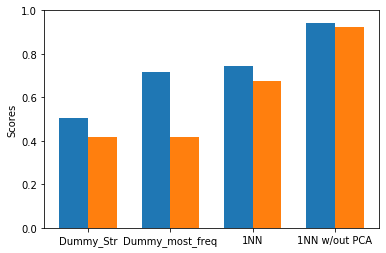

In [ ]:
labels = ['Dummy_Str', 'Dummy_most_freq','1NN', '1NN w/out PCA']
f1m.insert(0,f1micros[0])
f1M.insert(0,f1macros[0])

f1m.insert(0,f1_ds)
f1M.insert(0,f2_ds)

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1m, width, label='Micro')
rects2 = ax.bar(x + width/2, f1M, width, label='Macro')
ax.set_ylabel('Scores')
ax.set_ylim(top=1)
ax.set_xticks(x)
ax.set_xticklabels(labels)

Οι παρακάτω ποσοστιαίες μεταβολές έχουν προκύψει με βάση τα αποτελέσματα της συνάρτησης accuracy για τους διάφορους ταξινομητές όπως έχουν υπολογιστεί παραπάνω. Τελικά η προεπεξεργασία των δεδομένων είχε ως αποτέλεσμα τη μείωση της απόδοσης καθώς χάνεται χρήσιμη πληροφορία κατά την εκπαίδευση του μοντέλου. Ωστόσο χωρίς τη χρήση PCA, ο Νearest Neighbor ταξινομητής με υπερπαράμετρο ίση με 1, δηλαδή τη βέλτιστη, είχε ως αποτέλεσμα βελτίωση της τάξης του 8%.

In [ ]:
#D4
metavoli = [(d_acc-d_acc)/d_acc, (dstr_acc-d_acc)/d_acc, (knn2_acc-knn_acc)/knn_acc, (knn3_acc-knn_acc)/knn_acc]
table_data = [['Dummy_most_freq', 'Dummy_Str', '1NN', '1NN w/out PCA'],
              metavoli
]
for row in table_data:
    print("{: >25} {: >25} {: >25} {: >25}".format(*row))

          Dummy_most_freq                 Dummy_Str                       1NN             1NN w/out PCA
                      0.0       -0.2941176470588236       -0.1451612903225806        0.0806451612903226


5. 

Ο σχολιασμός των αποτελεσμάτων έγινε παραπάνω στα παραπάνω βήματα καθώς υπολογίζονταν τα επιμέρους μεγέθη. Γενικά βλέπουμε πως ακόμη και σε ένα μικρό dataset με εύκολα διαχωριζόμενα δείγματα, υπάρχει χώρος για βελτίωση των ταξινομητών. Παρόλα αυτά, λόγω του μικρού μεγέθους μπορεί κάποια προεπεξεργασία να προκαλέσει και ζημία στην συνολική επίδοση. 